**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources. Every effort has been made to trace copyright holders of the materials used in this notebook. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# 18: Support Vector Machine

*Support Vector Machines* (SVM) fue desarrollado para clasificaciones binarias, pero ha sido extendido para clasificaciones multiclases y regresión.

Se importan las librerias generales.

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter("ignore")
from sklearn.datasets.samples_generator import make_circles, make_blobs

Para el SVM de clasificación se genera la siguiente base de datos utilizando la función *make_blobs*.

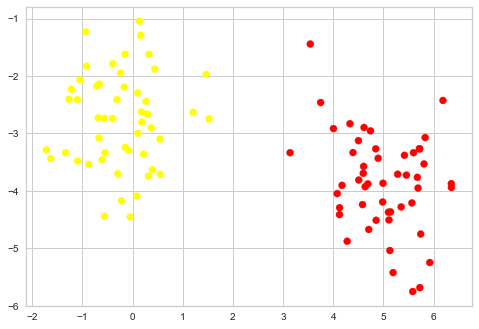

In [93]:
X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap="autumn");

Se aplica un SVC lineal y se entrena con todos los datos:

In [94]:
svc=SVC(kernel='linear')
svc.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

La siguiente función grafica los vectores de soporte y las márgenes del plano de decisión construido por el modelo. Está para un problema con dos variables predictoras (2D).

In [77]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    #print(model.support_vectors_)   # si se desea imprimir las coordendas de los Vectores de Soporte
    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "black");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

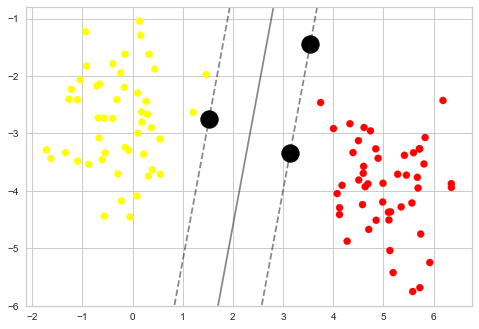

In [95]:
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = "autumn")
plt_svc(svc, plot_support=True)

Las márgenes del hiperplano de decisión es función del *C*. A continuación se grafica como cambia las márgenes definidas de acuerdo con el valor de *C*.

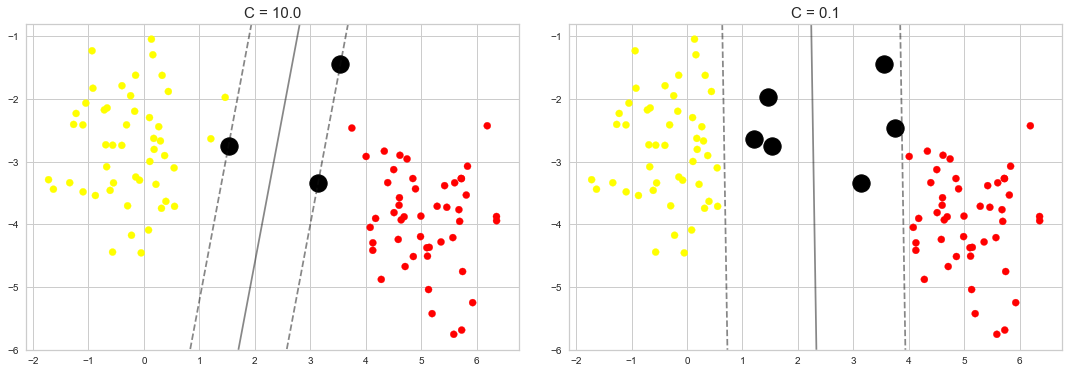

In [96]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,y)
    ax_i.scatter(X[:,0],X[:,1], c = y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)

## SVM para Clasificación (SVC)

Para este problema de clasificación se utilizará la base de datos Iris:

In [5]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris['data']
y=iris['target']
print('X:',np.shape(X))
print('y:',np.shape(y))

X: (150, 4)
y: (150,)


Se realiza la partición amplia de los datos en 80:20.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

Se instancias el modelo, en este caso solo con el argumento de probabilidad  de tal forma que se pueda obtener las probabilidades de cada clase, y un modelo lineal de kernel.

In [7]:
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

Se obtienen las predicciones para y_test.

In [8]:
y_pred=svc.predict(X_test)
print(y_pred[:10])
prediction_proba=svc.predict_proba(X_test)
print(prediction_proba[:10,:])

[2 2 1 2 1 1 0 2 0 0]
[[3.72026983e-03 1.19215604e-02 9.84358170e-01]
 [3.65143783e-03 4.22515537e-04 9.95926047e-01]
 [5.43319536e-02 9.33129964e-01 1.25380820e-02]
 [4.66175100e-03 2.14112689e-03 9.93197122e-01]
 [7.43802317e-02 9.08616237e-01 1.70035311e-02]
 [1.28914073e-02 9.74350541e-01 1.27580518e-02]
 [9.87662921e-01 6.67869462e-03 5.65838449e-03]
 [1.13508919e-02 5.80147457e-02 9.30634362e-01]
 [9.75661877e-01 1.49960756e-02 9.34204763e-03]
 [9.79377281e-01 1.11167764e-02 9.50594301e-03]]


Los resultados son los siguientes:

In [69]:
print(svc.score(X_test,y_test))

0.9333333333333333


Para seleccionar los parametros y trabajar con los datos de entrenamiento se utiliza KFold.

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5, random_state=1)
results = cross_val_score(svc, X_train, y_train, cv=kfold)
print(results.mean())
print(results.std())

0.9833333333333332
0.03333333333333335


Los resultados con diferentes métricas.

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.80      0.89        10
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



In [72]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0  8  2]
 [ 0  0  9]]


In [73]:
from sklearn.metrics import accuracy_score 
print('Precision para validacion:',accuracy_score(y_test,y_pred))

Precision para validacion: 0.9333333333333333


In [11]:
!pip install yellowbrick

## Hiperparámetros

Los siguientes hiperparámetros presentan diferentes opciones, las cuales deben ajustarse a tarvez de funciones como *Gridsearch* o la curva de validación. 

**C**: float, optional (default=1.0). Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

**kernel**: string, optional (default=’rbf’). Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

**gamma**: {‘scale’, ‘auto’} or float, optional (default=’scale’). Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features.

La curva de validación para el hiperparámetro C se obtiene de la siguiente manera.

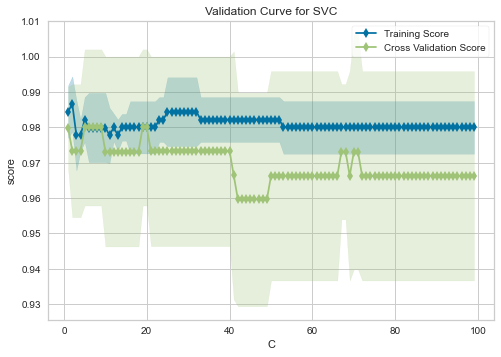

In [13]:
from yellowbrick.model_selection import ValidationCurve
c=np.arange(1,100)
k=ValidationCurve(svc,param_name='C', param_range=c, cv=4, scoring='f1_weighted',n_jobs=4)
k.fit(X,y)
k.show();

En los casos donde la función objetivo no es lineal, se utiliza la función no lineal (*Kernel trick*). A continuación se muestran dos ejemplos. El primero de ellos es el caso que veniamos trabajando de la base de datos Iris, utilizando una función no lineal de kernel *rbf*  y un gamma de 10. Para el segundo ejemplo se generará una base de datos.

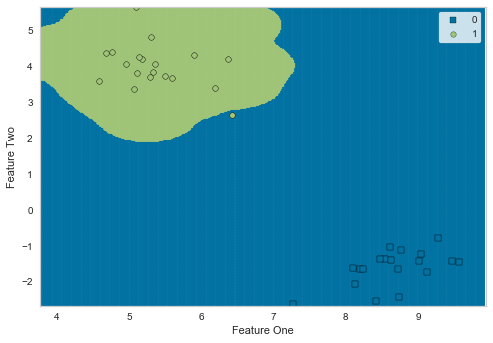

In [27]:
from yellowbrick.contrib.classifier import DecisionViz
viz=DecisionViz(SVC(C=30, kernel='rbf', gamma=10))
viz.fit(X_train[:,:2], y_train)
viz.draw(X_test[:,:2],y_test)
viz.show();

Para este caso se utiliza uan base de datos con un patrón radial, el cual un modelo lineal no puede solucionar como se muestra a continuación.

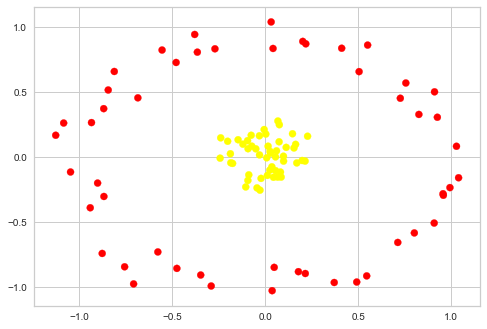

In [48]:
X, y = make_circles(100, factor = .1, noise = .1)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn");

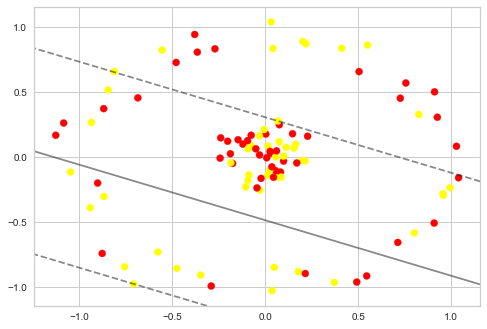

In [50]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,y), plot_support=False)

El anterior caso, se puede solucionar con una función de kernel no lineal *rbf*, y en este caso con un *C* muy pequeño.

In [52]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

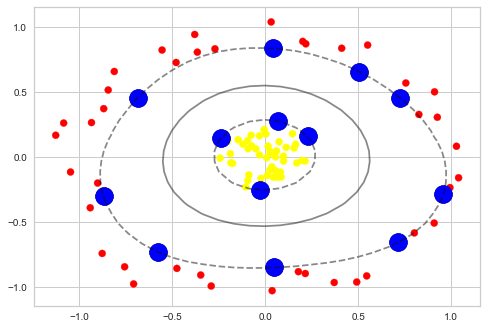

In [53]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue");

## SVM para Regresión (SVR)

El SVM con problemas de regresión funciona similar. En este caso se contruye una base de datos con una función real tipo seno.

In [111]:
X = np.sort(5*np.random.rand(200,1),axis=0)
y = np.sin(X).ravel()
y[::5] += 3*(0.5 - np.random.rand(40))

In [112]:
from sklearn.svm import SVR
svr = SVR()
svr_lin = SVR(kernel="linear", C=1000, gamma=0.1)
svr_rbf = SVR(kernel="rbf", C=1000, gamma=0.1)
y_lin = svr_lin.fit(X,y).predict(X)
y_rbf = svr_rbf.fit(X,y).predict(X)

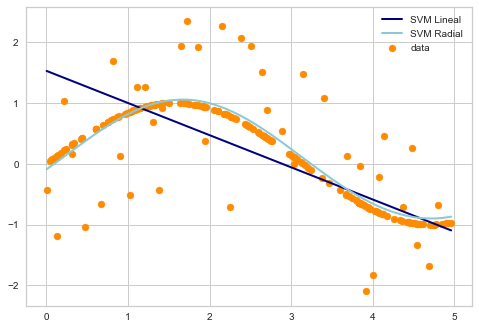

In [114]:
plt.scatter(X,y, color="darkorange", label="data")
plt.plot(X,y_lin, color="navy", lw = 2, label = "SVM Lineal")
plt.plot(X,y_rbf, color="c", lw=2, label="SVM Radial")
plt.legend();

Los resultados con *cross validation* para la solución lineal es:

In [ ]:
results = cross_val_score(svr_lin, X, y, cv=kfold)
print(results.mean())
print(results.std())

Los resultados con *cross validation* para la solución no lineal es:

In [ ]:
results = cross_val_score(svr_rbf_lin, X, y, cv=kfold)
print(results.mean())
print(results.std())